In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
# from yuval_notebooks.evaluate_sentiment import Evaluator

from sklearn.manifold import TSNE
import seaborn as sns
from numpy import linalg as LA
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer()


# np.random.seed(42)
rates_types_num = 5
df = pd.read_csv("csvs/products_reviews.csv")
cat = [-1,0,1]
def cat_y(y):
    if y<=2.0:
        return cat[0]
    elif y>=4.0:
        return cat[2]
    else:
        return cat[1]
df["label"] = df['Rate'].apply(cat_y)
cmap = plt.cm.viridis
def get_colors(n):
    return [cmap(i / float(n)) for i in range(n)]
df

,Unnamed: 0,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,title,category,ReviewMainTxt,Rate,positive,netural,negative,url,stanza_lemmatization,yap_lemmatization,label
0,0,0,0,0,0,\r\n\r\n מחשב נייד Appl...,c-pclaptop,\r\n מחשב נוח וכיפי ממליצה מאוד...,4,"\r\n ביצועים בשימוש יומיומי, איכות...",היקף החיבורים,,/ratemodel.aspx?modelid=1099482,"['מחשב', 'נוח', 'ו', 'כיפי', 'המליץ', 'מאוד', ...","['מחשב', 'נוח', 'ו', 'כיפי', 'המליץ', 'מאוד', ...",1
1,1,1,1,1,1,\r\n\r\n מחשב נייד Appl...,c-pclaptop,\r\n מחשב מצויין וחזק !!,5,"\r\n ביצועים בשימוש יומיומי, איכות...",NaN,,/ratemodel.aspx?modelid=1099482,"['מחשב', 'צוין', 'ו', 'חזק', '!', '!']","['מחשב', 'צוין', 'ו', 'חזק', '!', '!']",1
2,2,2,2,2,2,\r\n\r\n מחשב נייד Appl...,c-pclaptop,\r\n מחשב מושלם לכל סוג עבודה. ...,5,"\r\n ביצועים בשימוש יומיומי, איכות...",NaN,,/ratemodel.aspx?modelid=1099482,"['מחשב', 'מושלם', 'ל', 'כול', 'סוג', 'עבודה', ...","['מחשב', 'מושלם', 'ל', 'כול', 'סוג', 'עבודה', ...",1
3,3,3,3,3,3,\r\n\r\n מחשב נייד Appl...,c-pclaptop,\r\n מחשב מושלם - מהיר מאד. סול...,5,\r\n מהיר מאדסוללה מחזיקה מעמד כ-12...,NaN,אין,/ratemodel.aspx?modelid=1099482,"['מחשב', 'מושלם', '-', 'מהיר', 'מאוד', '.', 'ס...","['מחשב', 'מושלם', '-', 'מהיר', 'מאוד', '.', 'ס...",1
4,4,4,4,4,4,\r\n\r\n מחשב נייד Appl...,c-pclaptop,\r\n אפל עשתה עבודה טובה עם המע...,5,"\r\n מעבד מעולה, שקט לחלוטין\r\n ...",NaN,כרגע לא ניתן לחבר לשני מסכים חיצוניים,/ratemodel.aspx?modelid=1099482,"['אפל', 'עשה', 'עבודה', 'טוב', 'עם', 'ה', 'מעב...","['אפל', 'עשה', 'עבודה', 'טוב', 'עם', 'ה', 'מעב...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,5769,5769,5769,5769,5769,\r\n\r\n מיקרוגל Sharp ...,e-microwaveoven,\r\n המיקרו פועל בסדר אבל הגריל...,3,\r\n מיקרו מהיר\r\n,NaN,הגריל בקושי מתפקד אין לסמוך אליו,/ratemodel.aspx?modelid=964501,"['ה', 'מיקר', 'פעל', 'ב', 'סדר', 'אבל', 'ה', '...","['ה', 'מיקר', 'פעל', 'ב', 'סדר', 'אבל', 'ה', '...",0
5770,5770,5770,5770,5770,5770,\r\n\r\n מיקרוגל Sansui...,e-microwaveoven,"\r\n בדיוק השבוע הפסיק לעבוד, א...",4,"\r\n איכות חימום המזון, מהירות החי...",עוצמת רעש בעת העבודה,,/ratemodel.aspx?modelid=1091395,"['ב', 'ה', 'דיוק', 'ה', 'שבוע', 'הפסיק', 'עבד'...","['ב', 'ה', 'דיוק', 'ה', 'שבוע', 'הפסיק', 'עבד'...",1
5771,5771,5771,5771,5771,5771,\r\n\r\n מיקרוגל Sauter...,e-microwaveoven,\r\n מיקרו מעולה.מהטובים שרכשתי...,5,\r\n מאד פשוט להפעלה.מחמם מהר מאד.כ...,NaN,למען האמת לא מצאתי,/ratemodel.aspx?modelid=954477,"['מיקר', 'מעולה', '.', 'מ', 'ה', 'טוב', 'ש', '...","['מיקר', 'מעולה', '.', 'מ', 'ה', 'טוב', 'ש', '...",1
5772,5772,5772,5772,5772,5772,\r\n\r\n מיקרוגל Sauter...,e-microwaveoven,\r\n נקנה לפני שנה ועדיין עובד ...,4,\r\n עובד ומחמם טוב\r\n,NaN,בעיה בתפיסת תחתית הזכוכית.,/ratemodel.aspx?modelid=954477,"['נקנה', 'לפני', 'שנה', 'ו', 'עדיין', 'עובד', ...","['נקנה', 'לפני', 'שנה', 'ו', 'עדיין', 'עובד', ...",1


<AxesSubplot:title={'center':'Rates Frequency'}>

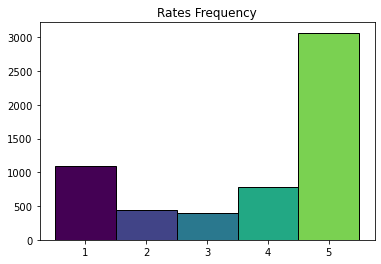

In [8]:
rate_counts =  df.Rate.value_counts().sort_index()
colors = get_colors(len(rate_counts))
rate_counts.plot(kind='bar', color=colors, width=1, rot=0, ec='k', title="Rates Frequency")

<AxesSubplot:title={'center':'Categories Frequency'}>

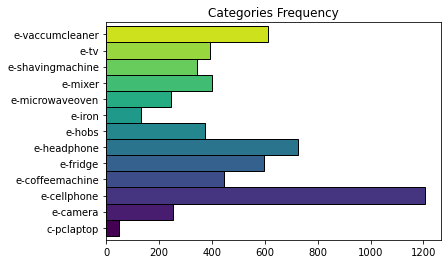

In [9]:
category =  df.category.value_counts().sort_index()
category.plot(kind='barh', color=get_colors(len(category)), width=1, rot=0, ec='k', title="Categories Frequency")

In [24]:
df_subset = pd.DataFrame()
df_subset['y'] = df["Rate"]
ReviewMainTxt = df.ReviewMainTxt
ReviewMainTxt = count_vectorizer.fit_transform(ReviewMainTxt)
ReviewMainTxt = transformer.fit_transform(ReviewMainTxt)

ReviewMainTxt = ReviewMainTxt[:100]
df_subset = df_subset[:100]


ReviewMainTxt


<100x172175 sparse matrix of type '<class 'numpy.float64'>'
	with 4949 stored elements in Compressed Sparse Row format>

In [23]:
print(ReviewMainTxt.to_numpy().shape)
norms = LA.norm(ReviewMainTxt.to_numpy(), axis=0)
print(norms.shape)


ReviewMainTxt /=norms
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
print(ReviewMainTxt.shape)
tsne_results = tsne.fit_transform(ReviewMainTxt)

df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

# plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", df_subset['y'].nunique()),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()

AttributeError: to_numpy not found

In [30]:
import math

import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv


def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return ListedColormap(initial_cm)


C:\Users\Rafy\miniconda3\envs\hebnlp\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Rafy\miniconda3\envs\hebnlp\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RG

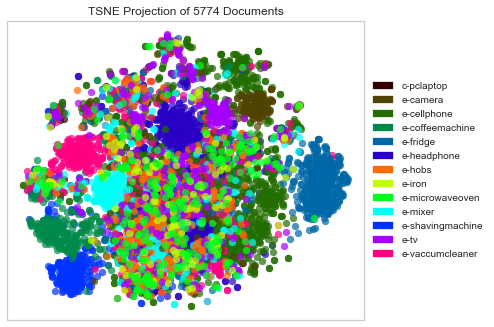

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

In [33]:

from yellowbrick.text.tsne import tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = df.ReviewMainTxt
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus)
y = df["category"]
Colormap = generate_colormap(y.nunique())
# y = df["Rate"]
tsne(X, y, colormap=Colormap)